In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import netCDF4 as nc
import cmocean.cm as cm 
from IPython.display import display, Math, Latex
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from scipy.io import loadmat
from scipy.interpolate import griddata
from dateutil.parser import parse
from salishsea_tools import geo_tools, viz_tools, tidetools, nc_tools
import xarray as xr
import gsw

%matplotlib inline

In [4]:
fname = '/ocean/ssahu/CANYONS/wcvi/initial_conditions/West_coast_NEMO_IC_high_resolution_wide_bdy.nc'

gridT = xr.open_dataset(fname)

In [5]:
lats = gridT['nav_lat'][:]
lons = gridT['nav_lon'][:]
sal = gridT['vosaline'][0,...]
temp = gridT['votemper'][0,...]
zlevels = gridT['deptht'][:]
z = np.multiply(zlevels[:],-1)

In [6]:
pressure = gsw.p_from_z(z, np.mean(lats))

In [7]:
pressure.shape

(40,)

In [ ]:
sal.shape

In [9]:
N2 = np.empty_like(sal)

(N2, p_mid) = gsw.stability.Nsquared(sal, temp, pressure_input, lat=None, axis=0)

N = np.sqrt(N2)

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


In [ ]:
N2.shape

In [ ]:
np.nanmean(N2)

In [ ]:
np.mean(N_sqr)

In [8]:
pressure_input=np.zeros_like(sal)

for i in np.arange(pressure_input.shape[0]):
    for j in np.arange(pressure_input.shape[1]):
        for k in np.arange(pressure_input.shape[2]):
            pressure_input[i,j,k] = pressure[i]

In [ ]:
np.mean(lats)

In [ ]:
pressure_input

In [ ]:
pressure

In [ ]:
lats.shape

In [ ]:
zlevels

In [ ]:
N.shape

In [ ]:
np.nanmax(N)

In [ ]:
np.nanmin(N)

In [ ]:
np.where(np.nanmax(N[0,0,:]))

/home/ssahu/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


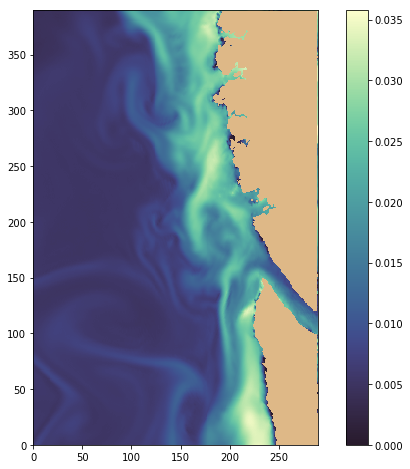

In [8]:
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'

N0 = np.ma.masked_values(N[0,...], 0)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(N0)
cmap = plt.get_cmap(cm.deep_r)
cmap.set_bad('burlywood')
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(N0, cmap=cmap, vmin = 0, vmax = 0.035789498226021829)
cbar = fig.colorbar(mesh)
viz_tools.plot_land_mask(ax, bathy, color='burlywood')
# cbar.set_label('Sea surface height (in m)')

/home/ssahu/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


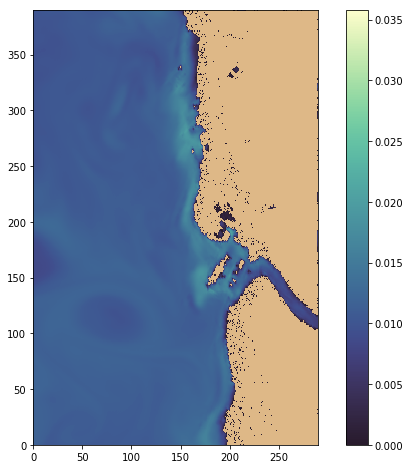

In [9]:
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'

N0 = np.ma.masked_values(N[10,...], 0)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(N0)
cmap = plt.get_cmap(cm.deep_r)
cmap.set_bad('burlywood')
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(N0, cmap=cmap, vmin = 0, vmax = 0.035789498226021829)
cbar = fig.colorbar(mesh)
viz_tools.plot_land_mask(ax, bathy, color='burlywood')
# cbar.set_label('Sea surface height (in m)')

In [19]:
import numpy as np
import netCDF4 as nc
import xarray as xr
from scipy.interpolate import griddata, interp1d
from salishsea_tools import (nc_tools, gsw_calls,viz_tools)
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm

fname = '/home/ssahu/saurav/JP_BC/cat_42_days_T.nc'

gridT = xr.open_dataset(fname)

mask = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/meshmask_files/JP_mesh_mask.nc')

tmask_JP = mask.variables['tmask'][0,:,55:420,446:730]

votemper_JP = np.array(gridT['votemper'][1,:,55:420,446:730]) #Our 1st day of NEMO run (set in namelist and atmos files from that day)  is second day of data which starts from beginning of month
votemper_JP[...] = np.ma.masked_array(votemper_JP[...], mask = tmask_JP[...])
votemper_JP[votemper_JP == 0] =['Nan']

vosaline_JP = np.array(gridT['vosaline'][1,:,55:420,446:730])
vosaline_JP[...] = np.ma.masked_array(vosaline_JP[...], mask = tmask_JP[...])
vosaline_JP[vosaline_JP == 0] = ['Nan']

glamt_bc_JP = np.array(gridT['nav_lon'][55:420,446:730])
gphit_bc_JP = np.array(gridT['nav_lat'][55:420,446:730])
deptht_JP = np.array(gridT['deptht'][:])

print("Removing Nan values from JP's data, since we replaced the zero masks with Nans")


Removing Nan values from JP's data, since we replaced the zero masks with Nans


In [20]:
for i in np.arange(1,votemper_JP.shape[0]):
    for p in np.arange(votemper_JP.shape[1]):
        for l in np.arange(votemper_JP.shape[2]):
            if np.isnan(votemper_JP[i,p,l]):
                votemper_JP[i,p,l] = votemper_JP[i-1,p,l]
            else:
                continue


for i in np.arange(1,vosaline_JP.shape[0]):
    for p in np.arange(vosaline_JP.shape[1]):
        for l in np.arange(vosaline_JP.shape[2]):
            if np.isnan(vosaline_JP[i,p,l]):
                vosaline_JP[i,p,l] = vosaline_JP[i-1,p,l]
            else:
                continue
                
                
for i in np.arange(votemper_JP.shape[0]):
    for p in np.arange(votemper_JP.shape[1]):
        for l in np.arange(votemper_JP.shape[2]):
            if np.isnan(votemper_JP[i,p,l]):
                votemper_JP[i,p,l] = votemper_JP[i,p,l-1]
            else:
                continue


for i in np.arange(vosaline_JP.shape[0]):
    for p in np.arange(vosaline_JP.shape[1]):
        for l in np.arange(vosaline_JP.shape[2]):
            if np.isnan(vosaline_JP[i,p,l]):
                vosaline_JP[i,p,l] = vosaline_JP[i,p,l-1]
            else:
                continue
                
for i in np.arange(vosaline_JP.shape[1]):
    for j in np.arange(vosaline_JP.shape[2]):
        if np.isnan(vosaline_JP[0,i,j]):
            vosaline_JP[0,i,j] = vosaline_JP[1,i,j]
        else:
            continue
            
            
for i in np.arange(votemper_JP.shape[1]):
    for j in np.arange(votemper_JP.shape[2]):
        if np.isnan(votemper_JP[0,i,j]):
            votemper_JP[0,i,j] = votemper_JP[1,i,j]
        else:
            continue

In [21]:
fname_wcvi = '/ocean/ssahu/CANYONS/wcvi/grid/coordinates_NEMO/coordinates_westcoast_seagrid_high_resolution_truncated_wider_west_bdy.nc'

with nc.Dataset(fname_wcvi, 'r') as coord:
    gphit_wcvi = coord.variables['gphit'][0,...];
    glamt_wcvi =  coord.variables['glamt'][0,...];

X = glamt_bc_JP.flatten();

Y = gphit_bc_JP.flatten();

points = (X[:],Y[:]);

xi = (glamt_wcvi.flatten(), gphit_wcvi.flatten());

votemper_ic = np.empty((votemper_JP.shape[0], glamt_wcvi.shape[0], glamt_wcvi.shape[1]));
vosaline_ic = np.empty((vosaline_JP.shape[0], glamt_wcvi.shape[0], glamt_wcvi.shape[1]));

for i in np.arange(votemper_JP.shape[0]):
    votemper_ic[i,...] = np.reshape(griddata(points, votemper_JP[i,...].flatten(), xi, method= 'linear'), glamt_wcvi.shape)
    vosaline_ic[i,...] = np.reshape(griddata(points, vosaline_JP[i,...].flatten(), xi, method= 'linear'), glamt_wcvi.shape)



print("Interpolation to WCVI horizontal points successful")

Interpolation to WCVI horizontal points successful


In [22]:
print("Interpolation to WCVI horizontal points successful")

print("Calling GSW tools to convert to Conservative Temperature and Reference Salinity")


lat = np.empty_like(gphit_wcvi)
lon = np.empty_like(gphit_wcvi)
depth = np.empty_like(deptht_JP)

lat[:] = gphit_wcvi[:]
lon[:] = glamt_wcvi[:]

depth[:] = deptht_JP[:]

z = np.multiply(depth[:],-1)

votemper_PT = np.empty_like(votemper_ic)
vosaline_PSU =np.empty_like(vosaline_ic)  

 
votemper_PT[:] = votemper_ic[:] 
vosaline_PSU[:] = vosaline_ic[:]

pressure = np.empty(z.shape)
lats = np.empty(pressure.shape)
lons = np.empty(pressure.shape)
lats[:] = np.mean(lat)
lons[:] = np.mean(lon)


vosaline_SA = np.empty(vosaline_PSU.shape)
vosaline_RS = np.empty(vosaline_PSU.shape)
votemper_CT = np.empty(votemper_PT.shape)

pressure = gsw_calls.generic_gsw_caller('gsw_p_from_z.m', [z, np.mean(lat)])

print("Converted z to p: first GSW call successful")

for i in np.arange(vosaline_SA.shape[0]):
    vosaline_SA[i,...] = gsw_calls.generic_gsw_caller('gsw_SA_from_SP', [vosaline_PSU[i,...],pressure[i],lons[i],lats[i]])

print("Got SA from SP: GSW ran successfully inside loop")

Interpolation to WCVI horizontal points successful
Calling GSW tools to convert to Conservative Temperature and Reference Salinity
Converted z to p: first GSW call successful
Got SA from SP: GSW ran successfully inside loop


In [23]:
votemper_CT[:] = gsw_calls.generic_gsw_caller('gsw_CT_from_pt', [vosaline_SA[:], votemper_PT[:]])


print("GSW Calls successfull")

mask_wcvi = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/meshmask_files/mesh_mask_high_res.nc')

NEMO_depth = mask_wcvi.variables['gdept_0'][0,:,0,0]
tmask_WCVI = mask_wcvi.variables['tmask'][:]


salinity_function = interp1d(depth, vosaline_SA, axis = 0, bounds_error=False, fill_value='extrapolate')
temperature_function = interp1d(depth, votemper_CT, axis = 0, bounds_error=False, fill_value='extrapolate')

vosaline_NEMO = np.empty((NEMO_depth.shape[0], vosaline_RS.shape[1], vosaline_RS.shape[2]));
votemper_NEMO = np.empty((NEMO_depth.shape[0], vosaline_RS.shape[1], vosaline_RS.shape[2]));

for indx in np.arange(NEMO_depth.shape[0]):
    vosaline_NEMO[indx,...] = salinity_function(NEMO_depth[indx]);
    votemper_NEMO[indx,...] = temperature_function(NEMO_depth[indx]);

for i in np.arange(votemper_NEMO.shape[0]):
    for p in np.arange(votemper_NEMO.shape[1]):
        for l in np.arange(votemper_NEMO.shape[2]):
            if np.isnan(votemper_NEMO[i,p,l]):
                votemper_NEMO[i,p,l] = votemper_NEMO[i-1,p,l]
            else:
                continue

                
for i in np.arange(vosaline_NEMO.shape[0]):
    for p in np.arange(vosaline_NEMO.shape[1]):
        for l in np.arange(vosaline_NEMO.shape[2]):
            if np.isnan(vosaline_NEMO[i,p,l]):
                vosaline_NEMO[i,p,l] = vosaline_NEMO[i-1,p,l]
            else:
                continue



print("Vertical Interpolation to WCVI depth levels successful")

GSW Calls successfull
Vertical Interpolation to WCVI depth levels successful


In [ ]:
pressure_input=np.zeros_like(vosaline_NEMO)

for i in np.arange(pressure_input.shape[0]):
    for j in np.arange(pressure_input.shape[1]):
        for k in np.arange(pressure_input.shape[2]):
            pressure_input[i,j,k] = pressure[i]

In [24]:
(N2, p_mid) = gsw.stability.Nsquared(vosaline_NEMO, votemper_NEMO, pressure_input, lat=None, axis=0)

N = np.sqrt(N2)

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


$\frac{\partial^2}{\partial z^2} w_m + \alpha^2 N^2 w_m = 0$


with boundary conditions of $(w_m = 0)$ at the surface and the bottom.


$z$ is the vertical coordinate, measured in m,
$w_m$ are the vertical velocity modes and
$N^2$ is a profile of Brunt-Vaisala (buoyancy) frequencies squared $[s^{-2}]$

In [27]:
rho = gsw.density.rho(vosaline_NEMO, votemper_NEMO, pressure_input)

/home/ssahu/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


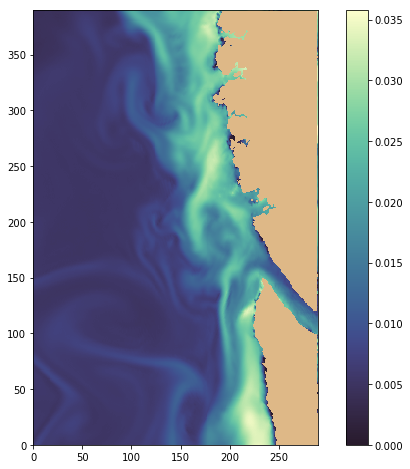

In [9]:
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'

N0 = np.ma.masked_values(N[0,...], 0)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(N0)
cmap = plt.get_cmap(cm.deep_r)
cmap.set_bad('burlywood')
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(N0, cmap=cmap, vmin = np.nanmin(N), vmax = np.nanmax(N) )#, vmin = 0, vmax = 0.035789498226021829)
cbar = fig.colorbar(mesh)
viz_tools.plot_land_mask(ax, bathy, color='burlywood')
# cbar.set_label('Sea surface height (in m)')

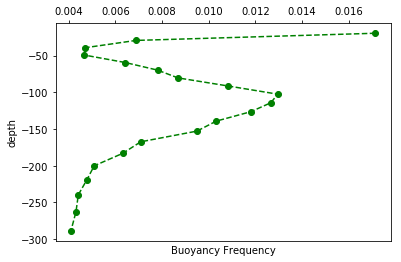

In [26]:
import matplotlib.pyplot as plt

# define data

N_z = N[:20,384,98]
Depth  = -zlevels[1:21]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(N_z, Depth, 'go--')
ax.xaxis.tick_top()

ax.set_ylabel('depth')
# ax.set_ylim(50, 0)
# ax.set_xlim(0, 25)
ax.set_xlabel('Buoyancy Frequency')

plt.show()

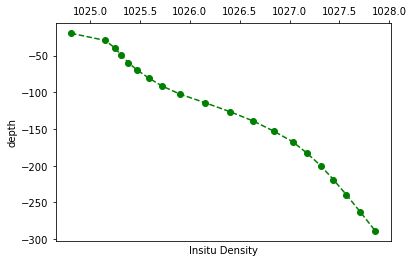

In [28]:
import matplotlib.pyplot as plt

# define data

rho_z = rho[:20,384,98]
Depth  = -zlevels[1:21]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(rho_z, Depth, 'go--')
ax.xaxis.tick_top()

ax.set_ylabel('depth')
# ax.set_ylim(50, 0)
# ax.set_xlim(0, 25)
ax.set_xlabel('Insitu Density')

plt.show()

In [32]:
for i in rho.shape[0]:
    for j in rho.shape[1]:
        for k in rho.shape[2]:
            print(np.where(rho[i,j,k]>rho[i+1,j,k]))

TypeError: 'int' object is not iterable

In [33]:
rho.shape

(40, 390, 290)

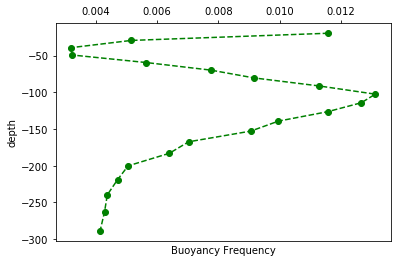

In [15]:
import matplotlib.pyplot as plt

# define data

N_z = N[:20,380,95]
Depth  = -zlevels[1:21]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(N_z, Depth, 'go--')
ax.xaxis.tick_top()

ax.set_ylabel('depth')
# ax.set_ylim(50, 0)
# ax.set_xlim(0, 25)
ax.set_xlabel('Buoyancy Frequency')

plt.show()

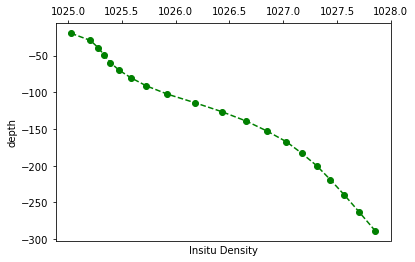

In [16]:
import matplotlib.pyplot as plt

# define data

rho_z = rho[:20,380,95]
Depth  = -zlevels[1:21]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(rho_z, Depth, 'go--')
ax.xaxis.tick_top()

ax.set_ylabel('depth')
# ax.set_ylim(50, 0)
# ax.set_xlim(0, 25)
ax.set_xlabel('Insitu Density')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# define data

N_z = N[:20,200,150]
Depth  = -zlevels[1:21]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(N_z, Depth, 'go--')
ax.xaxis.tick_top()

ax.set_ylabel('depth')
# ax.set_ylim(50, 0)
# ax.set_xlim(0, 25)
ax.set_xlabel('Buoyancy Frequency')

plt.show()

In [ ]:
np.where(N==np.nanmax(N))

In [260]:
"""Ocean vertical dynamic modes exercise code for Mathematical Modelling of Geophysical
Fluids MPE2013 Workshop at African Institute for Mathematical Sciences.
"""
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg


def dynmodes(Nsq, depth, nmodes):
    """Calculate the 1st nmodes ocean dynamic vertical modes
    given a profile of Brunt-Vaisala (buoyancy) frequencies squared.

    Based on http://woodshole.er.usgs.gov/operations/sea-mat/klinck-html/dynmodes.html
    by John Klinck, 1999.

    :arg Nsq: Brunt-Vaisala (buoyancy) frequencies squared in [1/s^2]
    :type Nsq: :class:`numpy.ndarray`

    :arg depth: Depths in [m]
    :type depth: :class:`numpy.ndarray`

    :arg nmodes: Number of modes to calculate
    :type nmodes: int

    :returns: :obj:`(wmodes, pmodes, rmodes, ce)` vertical velocity modes,
              horizontal velocity modes, vertical density modes, modal speeds
    :rtype: tuple of :class:`numpy.ndarray`
    """
    # 2nd derivative matrix plus boundary conditions
    d2dz2, nz, dz = build_d2dz2_matrix(depth)
    # N-squared diagonal matrix
    Nsq_mat = np.identity(nz) * Nsq
    # Solve generalized eigenvalue problem for eigenvalues and vertical
    # velocity modes
    eigenvalues, wmodes = scipy.linalg.eig(d2dz2, Nsq_mat)
#     eigenvalues, wmodes = clean_up_modes(eigenvalues, wmodes, nmodes)
    # Vertical density modes
    rmodes = wmodes * Nsq
    # Modal speeds
    ce = np.real(1 / np.sqrt(eigenvalues))
    # Horizontal velocity modes
    pmodes = np.zeros_like(wmodes)
    # 1st derivative of vertical modes
    pr = np.diff(wmodes) / dz
    # Linear interpolation on to the vertical coordinate grid
    pmodes[:, 1:nz - 1] = (pr[:, 1:nz - 1] + pr[:, :nz - 2]) / 2
    pmodes[:, 0] = pr[:, 0]
    pmodes[:, nz - 1] = pr[:, nz - 2]
    return wmodes, pmodes, rmodes, ce


# def build_d2dz2_matrix(depth):
#     """Build the matrix that discretizes the 2nd derivative
#     over the vertical coordinate, and applies the boundary conditions.

#     :arg depth: Depths in [m]
#     :type depth: :class:`numpy.ndarray`

#     :returns: :obj:`(d2dz2, nz, dz)` 2nd derivative matrix
#               (:class:`numpy.ndarray`),
#               number of vertical coordinate grid steps,
#               and array of vertical coordinate grid point spacings
#               (:class:`numpy.ndarray`)
#     :rtype: tuple
#     """
#     zed = -depth
#     # Number and size (in [m]) of vertical coordinate grid steps
#     nz = zed.size
#     dz = zed[:nz - 1] - zed[1:]
#     # Grid step midpoints
#     z_mid = zed[:nz - 1] - 0.5 * dz[:nz - 1]
#     # Size of steps between grid step midpoints
#     dz_mid = np.zeros_like(zed)
#     dz_mid[1:dz_mid.size - 1] = z_mid[:nz - 2] - z_mid[1:nz - 1]
#     dz_mid[0] = dz_mid[1]
#     dz_mid[dz_mid.size - 1] = dz_mid[dz_mid.size - 2]
#     # 2nd derivative matrix matrix
#     d2dz2 = np.zeros((nz, nz))
#     # Elements on the diagonal
#     diag_index = np.arange(1, nz - 1)
#     d2dz2[diag_index, diag_index] = (
#         1 / (dz[:nz - 2] * dz_mid[1:nz - 1]) + 1 / (dz[1:nz - 1] * dz_mid[1:nz - 1]))
#     # Elements on the super-diagonal
#     diag_index_p1 = np.arange(2, nz)
#     d2dz2[diag_index, diag_index_p1] = -1 / (dz[:nz - 2] * dz_mid[1:nz - 1])
#     # Elements on the sub-diagonal
#     diag_index_m1 = np.arange(nz - 2)
#     d2dz2[diag_index, diag_index_m1] = -1 / (dz[1:nz - 1] * dz_mid[1:nz - 1])
#     # Boundary conditions
#     d2dz2[0, 0] = d2dz2[nz - 1, 0] = -1
#     return d2dz2, nz, dz

def build_d2dz2_matrix(depth):
    """Build the matrix that discretizes the 2nd derivative
    over the vertical coordinate, and applies the boundary conditions.
    """
    zed = -np.array(depth)
    # Number and size (in [m]) of vertical coordinate grid steps
    # Number and size (in [m]) of vertical coordinate grid steps
    nz = zed.size
    dz = np.empty(nz -1)
    for i in np.arange(1,zed.shape[0]):
        dz[i-1] = zed[i] - zed[i-1]
#     dz = zed[:nz - 1] - zed[1:]
    # Grid step midpoints
    z_mid = zed[:nz - 1] - 0.5 * dz[:nz - 1]
    # Size of steps between grid step midpoints
    dz_mid = np.zeros_like(zed)
    dz_mid[1:dz_mid.size - 1] = z_mid[:nz - 2] - z_mid[1:nz - 1]
    dz_mid[0] = dz_mid[1]
    dz_mid[dz_mid.size - 1] = dz_mid[dz_mid.size - 2]
    # 2nd derivative matrix matrix
    d2dz2 = np.zeros((nz, nz))
    # Elements on the diagonal
    diag_index = np.arange(1, nz - 1)
    d2dz2[diag_index, diag_index] = (
        1 / (dz[:nz - 2] * dz_mid[1:nz - 1]) + 1 / (dz[1:nz - 1] * dz_mid[1:nz - 1]))
    # Elements on the super-diagonal
    diag_index_p1 = np.arange(2, nz)
    d2dz2[diag_index, diag_index_p1] = -1 / (dz[:nz - 2] * dz_mid[1:nz - 1])
    # Elements on the sub-diagonal
    diag_index_m1 = np.arange(nz - 2)
    d2dz2[diag_index, diag_index_m1] = -1 / (dz[1:nz - 1] * dz_mid[1:nz - 1])
    # Boundary conditions
    d2dz2[0, 0] = d2dz2[nz - 1, 0] = -1
    return d2dz2, nz, dz



# def clean_up_modes(eigenvalues, wmodes, nmodes):
#     """Exclude complex-valued and near-zero/negative eigenvalues and their modes.
#     Sort the eigenvalues and mode by increasing eigenvalue magnitude,
#     truncate the results to the number of modes that were requested,
#     and convert the modes from complex to real numbers.

#     :arg eigenvalues: Eigenvalues
#     :type eigenvalues: :class:`numpy.ndarray`

#     :arg wmodes: Modes
#     :type wmodes: :class:`numpy.ndarray`

#     :arg nmodes: Number of modes requested
#     :type nmodes: int

#     :returns: :obj:`(eigenvalues, wmodes)`
#     :rtype: tuple of :class:`numpy.ndarray`
#     """
#     # Transpose modes to that they can be handled as an array of vectors
#     wmodes = wmodes.transpose()
#     # Filter out complex-values and small/negative eigenvalues
#     # and corresponding modes
#     mask = np.imag(eigenvalues) == 0
#     eigenvalues = eigenvalues[mask]
#     wmodes = wmodes[mask]
#     mask = eigenvalues >= 1e-10
#     eigenvalues = eigenvalues[mask]
#     wmodes = wmodes[mask]
#     # Sort eigenvalues and modes and truncate to number of modes requests
#     index = np.argsort(eigenvalues)
#     eigenvalues = eigenvalues[index[:nmodes]]
#     wmodes = wmodes[index[:nmodes]]
#     return eigenvalues, wmodes.real


def plot_modes(Nsq, depth, nmodes, wmodes, pmodes, rmodes):
    """Plot Brunt-Vaisala (buoyancy) frequency profile and 3 sets of modes
    (vertical velocity, horizontal velocity, and vertical density) in 4 panes.

    :arg Nsq: Brunt-Vaisala (buoyancy) frequencies squared in [1/s^2]
    :type Nsq: :class:`numpy.ndarray`

    :arg depth: Depths in [m]
    :type depth: :class:`numpy.ndarray`

    :arg wmodes: Vertical velocity modes
    :type wmodes: :class:`numpy.ndarray`

    :arg pmodes: Horizontal velocity modes
    :type pmodes: :class:`numpy.ndarray`

    :arg rmodes: Vertical density modes
    :type rmodes: :class:`numpy.ndarray`

    :arg nmodes: Number of modes to calculate
    :type nmodes: int
    """
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(2, 2, 1)
    # Nsq
    ax.plot(Nsq, -depth)
    ax.ticklabel_format(style='sci', scilimits=(2, 2), axis='x')
    ax.set_ylabel('z')
    ax.set_xlabel('N^2')
    # modes
    mode_sets = [
        # (values, subplot number, x-axis title)
        (wmodes, 2, 'wmodes'),
        (pmodes, 3, 'pmodes'),
        (rmodes, 4, 'rmodes'),
    ]
    for mode_set in mode_sets:
        modes, subplot, title = mode_set
        ax = fig.add_subplot(2, 2, subplot)
        for i in np.arange(nmodes):
            ax.plot(modes[i], -depth, label='mode {}'.format(i + 1))
        ax.ticklabel_format(style='sci', scilimits=(3, 3), axis='x')
        ax.set_ylabel('z')
        ax.set_xlabel(title)
        ax.legend(loc='best')


def read_density_profile(filename):
    """Return depth and density arrays read from filename.

    :arg filename: Name of density profile file.
    :type filename: string

    :returns: :obj:`(depth, density)` depths, densities
    :rtype: tuple of :class:`numpy.ndarray`
    """
    depth = []
    density = []
    with open(filename) as f:
        for line in interesting_lines(f):
            deep, rho = map(float, line.split())
            depth.append(deep)
            density.append(rho)
    return np.array(depth), np.array(density)


def interesting_lines(f):
    for line in f:
        if line and not line.startswith('#'):
            yield line


def density2Nsq(depth, density, rho0=1028):
    """Return the Brunt-Vaisala (buoyancy) frequency (Nsq) profile
    corresponding to the given density profile.
    The surface Nsq value is set to the value of the 1st calculated value
    below the surface.
    Also return the depths for which the Brunt-Vaisala (buoyancy) frequencies squared
    were calculated.

    :arg depth: Depths in [m]
    :type depth: :class:`numpy.ndarray`

    :arg density: Densities in [kg/m^3]
    :type density: :class:`numpy.ndarray`

    :arg rho0: Reference density in [kg/m^3]; defaults to 1028
    :type rho0: number

    :returns: :obj:`(Nsq_depth, Nsq)` depths for which the Brunt-Vaisala
              (buoyancy) frequencies squared were calculated,
              Brunt-Vaisala (buoyancy) frequencies squared
    :rtype: tuple of :class:`numpy.ndarray`
    """
    grav_acc = 9.8  # m / s^2
    Nsq = np.zeros_like(density)
    Nsq[1:] = np.diff(density) * grav_acc / (np.diff(depth) * rho0)
    Nsq[0] = Nsq[1]
    Nsq[Nsq < 0] = 0
    Nsq_depth = np.zeros_like(depth)
    Nsq_depth[1:] = (depth[:depth.size - 1] + depth[1:]) / 2
    return Nsq_depth, Nsq


In [ ]:
# 2nd derivative matrix matrix
d2dz2 = np.zeros((nz, nz))
# Elements on the diagonal
diag_index = np.arange(1, nz - 1)
d2dz2[diag_index, diag_index] = (
    1 / (dz[:nz - 2] * dz_mid[1:nz - 1]) + 1 / (dz[1:nz - 1] * dz_mid[1:nz - 1]))
# Elements on the super-diagonal
diag_index_p1 = np.arange(2, nz)
d2dz2[diag_index, diag_index_p1] = -1 / (dz[:nz - 2] * dz_mid[1:nz - 1])
# Elements on the sub-diagonal
diag_index_m1 = np.arange(nz - 2)
d2dz2[diag_index, diag_index_m1] = -1 / (dz[1:nz - 1] * dz_mid[1:nz - 1])
# Boundary conditions
d2dz2[0, 0] = d2dz2[nz - 1, 0] = -1

In [ ]:
def build_d2dz2_matrix(depth):
    """Build the matrix that discretizes the 2nd derivative
    over the vertical coordinate, and applies the boundary conditions.

    :arg depth: Depths in [m]
    :type depth: :class:`numpy.ndarray`

    :returns: :obj:`(d2dz2, nz, dz)` 2nd derivative matrix
              (:class:`numpy.ndarray`),
              number of vertical coordinate grid steps,
              and array of vertical coordinate grid point spacings
              (:class:`numpy.ndarray`)
    :rtype: tuple
  """


    zed = -zlevels
    # Number and size (in [m]) of vertical coordinate grid steps
    nz = zed.size
    dz = np.diff(a=zed)
    z_mid = zed[:nz - 1] - 0.5 * dz[:nz - 1]
    # Size of steps between grid step midpoints
    dz_mid = np.zeros_like(z_mid)
    dz_mid[1:dz_mid.size - 1] = z_mid[:nz - 2] - z_mid[1:nz - 1]
    dz_mid[0] = dz_mid[1]
    dz_mid[dz_mid.size - 1] = dz_mid[dz_mid.size - 2]
    # 2nd derivative matrix matrix
    d2dz2 = np.zeros((nz, nz))
    # Elements on the diagonal
    diag_index = np.arange(1, nz - 1)
    d2dz2[diag_index, diag_index] = (
        1 / (dz[:nz - 2] * dz_mid[1:nz - 1]) + 1 / (dz[1:nz - 1] * dz_mid[1:nz - 1]))
    # Elements on the super-diagonal
    diag_index_p1 = np.arange(2, nz)
    d2dz2[diag_index, diag_index_p1] = -1 / (dz[:nz - 2] * dz_mid[1:nz - 1])
    # Elements on the sub-diagonal
    diag_index_m1 = np.arange(nz - 2)
    d2dz2[diag_index, diag_index_m1] = -1 / (dz[1:nz - 1] * dz_mid[1:nz - 1])
    # Boundary conditions
    d2dz2[0, 0] = d2dz2[nz - 1, 0] = -1
    return d2dz2, nz, dz

In [ ]:
dz = zed[:nz - 1] - zed[1:]

In [ ]:
dz.shape

In [ ]:
zed.shape

In [ ]:
# Grid step midpoints
z_mid = zed[:nz - 1] - 0.5 * dz[:nz - 1]

In [ ]:
z_mid.shape

In [ ]:
# Size of steps between grid step midpoints
dz_mid = np.zeros_like(z_mid)
dz_mid[1:dz_mid.size - 1] = z_mid[:nz - 2] - z_mid[1:nz - 1]
dz_mid[0] = dz_mid[1]
dz_mid[dz_mid.size - 1] = dz_mid[dz_mid.size - 2]
# 2nd derivative matrix matrix
d2dz2 = np.zeros((nz, nz))
# Elements on the diagonal
diag_index = np.arange(1, nz - 1)
d2dz2[diag_index, diag_index] = (
    1 / (dz[:nz - 2] * dz_mid[1:nz - 1]) + 1 / (dz[1:nz - 1] * dz_mid[1:nz - 1]))
# Elements on the super-diagonal
diag_index_p1 = np.arange(2, nz)
d2dz2[diag_index, diag_index_p1] = -1 / (dz[:nz - 2] * dz_mid[1:nz - 1])
# Elements on the sub-diagonal
diag_index_m1 = np.arange(nz - 2)
d2dz2[diag_index, diag_index_m1] = -1 / (dz[1:nz - 1] * dz_mid[1:nz - 1])
# Boundary conditions
d2dz2[0, 0] = d2dz2[nz - 1, 0] = -1
#     return d2dz2, nz, dz

In [ ]:
N2.shape

In [ ]:
np.where(np.isnan(N2), ma.array(N2, mask=np.isnan(N2)).min(axis=0), N2)

In [ ]:
for i in np.arange(N2.shape[0]):
    for j in np.arange(N2.shape[1]):
        for k in np.arange(N2.shape[2]):
            if np.isnan(N2[i,j,k]):
                N2[i,j,k] = np.nanmean(N2[:,j,k])

In [ ]:
N = np.sqrt(N2)

In [ ]:
N.shape

In [ ]:
g = 9.81
pi = 3.27

for i in np.arange(N.shape[0]-2):
    D = (np.sqrt(np.matmul(N[i,...],np.diff(zlevels[i]))))/(g*pi*pi)
    c = np.sqrt(g*D)

In [ ]:
N2[:,100,100]

In [ ]:
(wmodes, pmodes, rmodes, ce) = dynmodes(N2[:5,0,0], zlevels[:5], 2)

In [ ]:
N2[:5,0,0]

In [ ]:
zlevels.shape

In [51]:
d2dz2, nz, dz = build_d2dz2_matrix(zlevels)

/home/ssahu/anaconda3/lib/python3.5/site-packages/xarray/core/variable.py:1047: RuntimeWarning: divide by zero encountered in true_divide
  else f(other_data, self_data))


In [277]:
# wmodes = np.empty((5, zlevels[1:].shape[0], N2.shape[1], N2.shape[2]))
# pmodes = np.empty_like(wmodes)
# rmodes = np.empty_like(wmodes)
# ce = np.empty((N2.shape[1], N2.shape[2]))


# for i in np.arange(N2.shape[1]):
#     for j in np.arange(N2.shape[2]):
# (wmodes[:,:,i,j], pmodes[:,:,i,j], rmodes[:,:,i,j], ce[i,j]) = dynmodes(N2[:,i,j],zlevels[1:], 5)
     
    
wmodes, pmodes, rmodes, ce = dynmodes(N2[:,384,98],zlevels[1:], 5)

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:40: RuntimeWarning: divide by zero encountered in true_divide
/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in true_divide


In [274]:
wmodes, pmodes, rmodes, ce = dynmodes(N2[:,384,98],zlevels[1:], 2)

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:40: RuntimeWarning: divide by zero encountered in true_divide
/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in true_divide


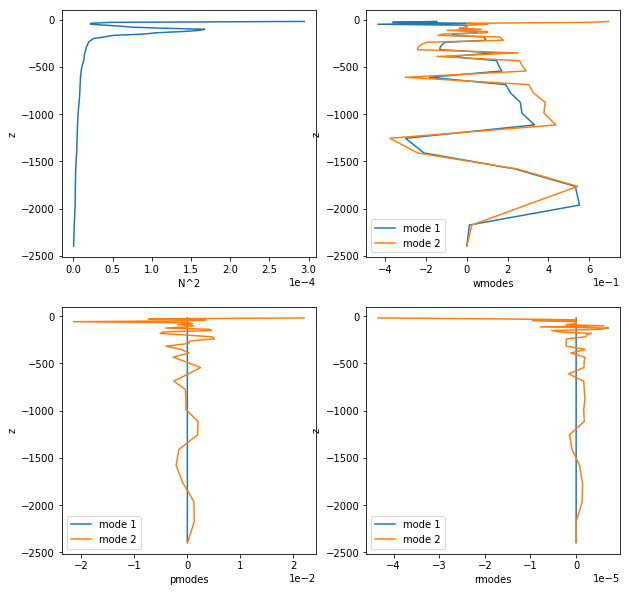

In [282]:
plot_modes(N2[:,384,98], zlevels[1:], 2, wmodes[1:25], pmodes, rmodes)

In [278]:
ce

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  inf,   0.])

In [279]:
ce

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  inf,   0.])

In [245]:
wmodes.shape

(5, 39, 390, 290)

In [66]:
np.isinf(N2[:,0,0])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

In [233]:
wmodes

array([], shape=(0, 39), dtype=float64)

In [15]:
depth = zlevels


zed = -depth
# Number and size (in [m]) of vertical coordinate grid steps
nz = zed.size
dz = zed[:nz - 1] - zed[1:]
# Grid step midpoints
z_mid = zed[:nz - 1] - 0.5 * dz[:nz - 1]

In [16]:
z_mid.shape

(38,)

In [17]:
nz

40

In [31]:
dz_mid = np.zeros_like(zed)
dz_mid[1:dz_mid.size - 1] = z_mid[:nz - 2] - z_mid[:nz - 1]

In [32]:
z_mid[:nz - 2].shape

(38,)

In [34]:
z_mid[:nz - 1].shape

(38,)

In [36]:
dz_mid[0] = dz_mid[1]
dz_mid[dz_mid.size - 1] = dz_mid[dz_mid.size - 2]
# 2nd derivative matrix matrix
d2dz2 = np.zeros((nz, nz))
# Elements on the diagonal
diag_index = np.arange(1, nz - 1)

In [38]:
dz[:nz - 2].shape

(38,)

In [39]:
dz_mid[1:nz - 1].shape

(38,)

In [40]:
dz[1:nz - 1].shape

(37,)

In [41]:
dz_mid[1:nz - 1].shape

(38,)

In [44]:
d2dz2[diag_index, diag_index] = (
    1 / (dz[:nz - 2] * dz_mid[1:nz - 1]) + 1 / (dz[:nz - 1] * dz_mid[1:nz - 1]))

/home/ssahu/anaconda3/lib/python3.5/site-packages/xarray/core/variable.py:1047: RuntimeWarning: divide by zero encountered in true_divide
  else f(other_data, self_data))


In [46]:
diag_index_p1 = np.arange(2, nz)
d2dz2[diag_index, diag_index_p1] = -1 / (dz[:nz - 2] * dz_mid[1:nz - 1])

/home/ssahu/anaconda3/lib/python3.5/site-packages/xarray/core/variable.py:1047: RuntimeWarning: divide by zero encountered in true_divide
  else f(other_data, self_data))


In [49]:
diag_index_m1 = np.arange(nz - 2)
d2dz2[diag_index, diag_index_m1] = -1 / (dz[:nz - 1] * dz_mid[1:nz - 1])

/home/ssahu/anaconda3/lib/python3.5/site-packages/xarray/core/variable.py:1047: RuntimeWarning: divide by zero encountered in true_divide
  else f(other_data, self_data))


In [48]:
dz[1:nz - 1].shape

(37,)

In [144]:
def build_d2dz2_matrix(depth):
    """Build the matrix that discretizes the 2nd derivative
    over the vertical coordinate, and applies the boundary conditions.
    """
    zed = -depth
    # Number and size (in [m]) of vertical coordinate grid steps
    nz = zed.size
    dz = zed[:nz] - zed[1:-1]
    # Grid step midpoints
    z_mid = zed[:nz - 1] - 0.5 * dz[:nz - 1]
    # Size of steps between grid step midpoints
    dz_mid = np.zeros_like(zed)
#     for i in np.arange(1,nz):
#         dz_mid[i] = z_mid[i - 2] - z_mid[i-1]
    dz_mid[1:dz_mid.size - 1] = z_mid[:nz - 2] - z_mid[:nz - 1]
    dz_mid[0] = dz_mid[1]
    dz_mid[dz_mid.size - 1] = dz_mid[dz_mid.size - 2]
    # 2nd derivative matrix matrix
    d2dz2 = np.zeros((nz, nz))
    # Elements on the diagonal
    diag_index = np.arange(1, nz - 1)
    d2dz2[diag_index, diag_index] = (
        1 / (dz[:nz - 2] * dz_mid[1:nz - 1]) + 1 / (dz[:nz - 1] * dz_mid[1:nz - 1]))
    # Elements on the super-diagonal
    diag_index_p1 = np.arange(2, nz)
    d2dz2[diag_index, diag_index_p1] = -1 / (dz[:nz - 2] * dz_mid[1:nz - 1])
    # Elements on the sub-diagonal
    diag_index_m1 = np.arange(nz - 2)
    d2dz2[diag_index, diag_index_m1] = -1 / (dz[:nz - 1] * dz_mid[1:nz - 1])
    # Boundary conditions
    d2dz2[0, 0] = d2dz2[nz - 1, 0] = -1
    from numpy import inf

    d2dz2[d2dz2 == -inf] = 0
    d2dz2[d2dz2 == inf] = 0
    return d2dz2, nz, dz


"""Ocean vertical dynamic modes exercise code for Mathematical Modelling of Geophysical
Fluids MPE2013 Workshop at African Institute for Mathematical Sciences.
"""
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg


def dynmodes(Nsq, depth, nmodes):
    """Calculate the 1st nmodes ocean dynamic vertical modes
    given a profile of Brunt-Vaisala (buoyancy) frequencies squared.

    Based on http://woodshole.er.usgs.gov/operations/sea-mat/klinck-html/dynmodes.html
    by John Klinck, 1999.

    :arg Nsq: Brunt-Vaisala (buoyancy) frequencies squared in [1/s^2]
    :type Nsq: :class:`numpy.ndarray`

    :arg depth: Depths in [m]
    :type depth: :class:`numpy.ndarray`

    :arg nmodes: Number of modes to calculate
    :type nmodes: int

    :returns: :obj:`(wmodes, pmodes, rmodes, ce)` vertical velocity modes,
              horizontal velocity modes, vertical density modes, modal speeds
    :rtype: tuple of :class:`numpy.ndarray`
    """
    # 2nd derivative matrix plus boundary conditions
    d2dz2, nz, dz = build_d2dz2_matrix(depth)
    # N-squared diagonal matrix
    Nsq_mat = np.identity(nz) * Nsq
    # Solve generalized eigenvalue problem for eigenvalues and vertical
    # velocity modes
    eigenvalues, wmodes = scipy.linalg.eig(d2dz2, Nsq_mat)
    eigenvalues, wmodes = clean_up_modes(eigenvalues, wmodes, nmodes)
    # Vertical density modes
    rmodes = wmodes * Nsq
    # Modal speeds
    ce = np.real(1 / np.sqrt(eigenvalues))
    # Horizontal velocity modes
    pmodes = np.zeros_like(wmodes)
    # 1st derivative of vertical modes
    pr = np.diff(wmodes) / dz
    # Linear interpolation on to the vertical coordinate grid
    pmodes[:, 1:nz - 1] = (pr[:, 1:nz - 1] + pr[:, :nz - 2]) / 2
    pmodes[:, 0] = pr[:, 0]
    pmodes[:, nz - 1] = pr[:, nz - 2]
    return wmodes, pmodes, rmodes, ce


# def build_d2dz2_matrix(depth):
#     """Build the matrix that discretizes the 2nd derivative
#     over the vertical coordinate, and applies the boundary conditions.

#     :arg depth: Depths in [m]
#     :type depth: :class:`numpy.ndarray`

#     :returns: :obj:`(d2dz2, nz, dz)` 2nd derivative matrix
#               (:class:`numpy.ndarray`),
#               number of vertical coordinate grid steps,
#               and array of vertical coordinate grid point spacings
#               (:class:`numpy.ndarray`)
#     :rtype: tuple
#     """
#     zed = -depth
#     # Number and size (in [m]) of vertical coordinate grid steps
#     nz = zed.size
#     dz = zed[:nz - 1] - zed[1:]
#     # Grid step midpoints
#     z_mid = zed[:nz - 1] - 0.5 * dz[:nz - 1]
#     # Size of steps between grid step midpoints
#     dz_mid = np.zeros_like(zed)
#     dz_mid[1:dz_mid.size - 1] = z_mid[:nz - 2] - z_mid[1:nz - 1]
#     dz_mid[0] = dz_mid[1]
#     dz_mid[dz_mid.size - 1] = dz_mid[dz_mid.size - 2]
#     # 2nd derivative matrix matrix
#     d2dz2 = np.zeros((nz, nz))
#     # Elements on the diagonal
#     diag_index = np.arange(1, nz - 1)
#     d2dz2[diag_index, diag_index] = (
#         1 / (dz[:nz - 2] * dz_mid[1:nz - 1]) + 1 / (dz[1:nz - 1] * dz_mid[1:nz - 1]))
#     # Elements on the super-diagonal
#     diag_index_p1 = np.arange(2, nz)
#     d2dz2[diag_index, diag_index_p1] = -1 / (dz[:nz - 2] * dz_mid[1:nz - 1])
#     # Elements on the sub-diagonal
#     diag_index_m1 = np.arange(nz - 2)
#     d2dz2[diag_index, diag_index_m1] = -1 / (dz[1:nz - 1] * dz_mid[1:nz - 1])
#     # Boundary conditions
#     d2dz2[0, 0] = d2dz2[nz - 1, 0] = -1
#     return d2dz2, nz, dz


def clean_up_modes(eigenvalues, wmodes, nmodes):
    """Exclude complex-valued and near-zero/negative eigenvalues and their modes.
    Sort the eigenvalues and mode by increasing eigenvalue magnitude,
    truncate the results to the number of modes that were requested,
    and convert the modes from complex to real numbers.

    :arg eigenvalues: Eigenvalues
    :type eigenvalues: :class:`numpy.ndarray`

    :arg wmodes: Modes
    :type wmodes: :class:`numpy.ndarray`

    :arg nmodes: Number of modes requested
    :type nmodes: int

    :returns: :obj:`(eigenvalues, wmodes)`
    :rtype: tuple of :class:`numpy.ndarray`
    """
    # Transpose modes to that they can be handled as an array of vectors
    wmodes = wmodes.transpose()
    # Filter out complex-values and small/negative eigenvalues
    # and corresponding modes
    mask = np.imag(eigenvalues) == 0
    eigenvalues = eigenvalues[mask]
    wmodes = wmodes[mask]
    mask = eigenvalues >= 1e-10
    eigenvalues = eigenvalues[mask]
    wmodes = wmodes[mask]
    # Sort eigenvalues and modes and truncate to number of modes requests
    index = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[index[:nmodes]]
    wmodes = wmodes[index[:nmodes]]
    return eigenvalues, wmodes.real


def plot_modes(Nsq, depth, nmodes, wmodes, pmodes, rmodes):
    """Plot Brunt-Vaisala (buoyancy) frequency profile and 3 sets of modes
    (vertical velocity, horizontal velocity, and vertical density) in 4 panes.

    :arg Nsq: Brunt-Vaisala (buoyancy) frequencies squared in [1/s^2]
    :type Nsq: :class:`numpy.ndarray`

    :arg depth: Depths in [m]
    :type depth: :class:`numpy.ndarray`

    :arg wmodes: Vertical velocity modes
    :type wmodes: :class:`numpy.ndarray`

    :arg pmodes: Horizontal velocity modes
    :type pmodes: :class:`numpy.ndarray`

    :arg rmodes: Vertical density modes
    :type rmodes: :class:`numpy.ndarray`

    :arg nmodes: Number of modes to calculate
    :type nmodes: int
    """
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(2, 2, 1)
    # Nsq
    ax.plot(Nsq, -depth)
    ax.ticklabel_format(style='sci', scilimits=(2, 2), axis='x')
    ax.set_ylabel('z')
    ax.set_xlabel('N^2')
    # modes
    mode_sets = [
        # (values, subplot number, x-axis title)
        (wmodes, 2, 'wmodes'),
        (pmodes, 3, 'pmodes'),
        (rmodes, 4, 'rmodes'),
    ]
    for mode_set in mode_sets:
        modes, subplot, title = mode_set
        ax = fig.add_subplot(2, 2, subplot)
        for i in xrange(nmodes):
            ax.plot(modes[i], -depth, label='mode {}'.format(i + 1))
        ax.ticklabel_format(style='sci', scilimits=(3, 3), axis='x')
        ax.set_ylabel('z')
        ax.set_xlabel(title)
        ax.legend(loc='best')


def read_density_profile(filename):
    """Return depth and density arrays read from filename.

    :arg filename: Name of density profile file.
    :type filename: string

    :returns: :obj:`(depth, density)` depths, densities
    :rtype: tuple of :class:`numpy.ndarray`
    """
    depth = []
    density = []
    with open(filename) as f:
        for line in interesting_lines(f):
            deep, rho = map(float, line.split())
            depth.append(deep)
            density.append(rho)
    return np.array(depth), np.array(density)


def interesting_lines(f):
    for line in f:
        if line and not line.startswith('#'):
            yield line


def density2Nsq(depth, density, rho0=1028):
    """Return the Brunt-Vaisala (buoyancy) frequency (Nsq) profile
    corresponding to the given density profile.
    The surface Nsq value is set to the value of the 1st calculated value
    below the surface.
    Also return the depths for which the Brunt-Vaisala (buoyancy) frequencies squared
    were calculated.

    :arg depth: Depths in [m]
    :type depth: :class:`numpy.ndarray`

    :arg density: Densities in [kg/m^3]
    :type density: :class:`numpy.ndarray`

    :arg rho0: Reference density in [kg/m^3]; defaults to 1028
    :type rho0: number

    :returns: :obj:`(Nsq_depth, Nsq)` depths for which the Brunt-Vaisala
              (buoyancy) frequencies squared were calculated,
              Brunt-Vaisala (buoyancy) frequencies squared
    :rtype: tuple of :class:`numpy.ndarray`
    """
    grav_acc = 9.8  # m / s^2
    Nsq = np.zeros_like(density)
    Nsq[1:] = np.diff(density) * grav_acc / (np.diff(depth) * rho0)
    Nsq[0] = Nsq[1]
    Nsq[Nsq < 0] = 0
    Nsq_depth = np.zeros_like(depth)
    Nsq_depth[1:] = (depth[:depth.size - 1] + depth[1:]) / 2
    return Nsq_depth, Nsq

In [145]:
(wmodes, pmodes, rmodes, ce) = dynmodes(N2[:,0,0], zlevels[1:], 2)

/home/ssahu/anaconda3/lib/python3.5/site-packages/xarray/core/variable.py:1047: RuntimeWarning: divide by zero encountered in true_divide
  else f(other_data, self_data))


ValueError: operands could not be broadcast together with shapes (0,38) (35,) 

In [131]:
dz.shape

(38,)

In [89]:
depth = zlevels

zed = -depth
# Number and size (in [m]) of vertical coordinate grid steps
nz = zed.size
dz = zed[:nz] - zed[1:]

In [90]:
d2dz2[diag_index, diag_index] = (
    1 / (dz[:nz - 2] * dz_mid[1:nz - 1]) + 1 / (dz[:nz - 1] * dz_mid[1:nz - 1]))
# Elements on the super-diagonal
diag_index_p1 = np.arange(2, nz)
d2dz2[diag_index, diag_index_p1] = -1 / (dz[:nz - 2] * dz_mid[1:nz - 1])
# Elements on the sub-diagonal
diag_index_m1 = np.arange(nz - 2)
d2dz2[diag_index, diag_index_m1] = -1 / (dz[:nz - 1] * dz_mid[1:nz - 1])
# Boundary conditions
d2dz2[0, 0] = d2dz2[nz - 1, 0] = -1
return d2dz2, nz, dz

(39,)

In [101]:
d2dz2, nz, dz = build_d2dz2_matrix(zlevels)

/home/ssahu/anaconda3/lib/python3.5/site-packages/xarray/core/variable.py:1047: RuntimeWarning: divide by zero encountered in true_divide
  else f(other_data, self_data))


In [106]:
from numpy import inf

d2dz2[d2dz2 == -inf] = 0
d2dz2[d2dz2 == inf] = 0

In [108]:
d2dz2

array([[-1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.]])

In [181]:
wmodes


array([[ 0.        ,  0.02108334,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.99977772,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [182]:
eigenvalues

array([     0.00000000+0.j, -25595.67294685+0.j,      0.00000000+0.j,
            0.00000000+0.j,      0.00000000+0.j,      0.00000000+0.j,
            0.00000000+0.j,      0.00000000+0.j,      0.00000000+0.j,
            0.00000000+0.j,      0.00000000+0.j,      0.00000000+0.j,
            0.00000000+0.j,      0.00000000+0.j,      0.00000000+0.j,
            0.00000000+0.j,      0.00000000+0.j,      0.00000000+0.j,
            0.00000000+0.j,      0.00000000+0.j,      0.00000000+0.j,
            0.00000000+0.j,      0.00000000+0.j,      0.00000000+0.j,
            0.00000000+0.j,      0.00000000+0.j,      0.00000000+0.j,
            0.00000000+0.j,      0.00000000+0.j,      0.00000000+0.j,
            0.00000000+0.j,      0.00000000+0.j,      0.00000000+0.j,
            0.00000000+0.j,      0.00000000+0.j,      0.00000000+0.j,
            0.00000000+0.j,      0.00000000+0.j,      0.00000000+0.j])

In [199]:
np.diff(wmodes[:-2,:-1]).shape

(37, 37)

In [196]:
dz.shape

(37,)

In [194]:
np.diff(wmodes).shape

(39, 38)

In [203]:
d2dz2, nz, dz = build_d2dz2_matrix(zlevels[1:])
# N-squared diagonal matrix
Nsq_mat = np.identity(nz) * N2[:,0,0]
# Solve generalized eigenvalue problem for eigenvalues and vertical
# velocity modes
eigenvalues, wmodes = scipy.linalg.eig(d2dz2, Nsq_mat)
# eigenvalues, wmodes = clean_up_modes(eigenvalues, wmodes, 1000)
# Vertical density modes
rmodes = wmodes * N2[:,0,0]
# Modal speeds
ce = np.real(1 / np.sqrt(eigenvalues))
# Horizontal velocity modes
pmodes = np.zeros_like(wmodes)
# 1st derivative of vertical modes
pr = np.divide(np.diff(wmodes[:-2,:]), dz)
# Linear interpolation on to the vertical coordinate grid
pmodes[:, 1:nz - 1] = (pr[:, 1:nz - 1] + pr[:, :nz - 2]) / 2
pmodes[:, 0] = pr[:, 0]
pmodes[:, nz - 1] = pr[:, nz - 2]

/home/ssahu/anaconda3/lib/python3.5/site-packages/xarray/core/variable.py:1047: RuntimeWarning: divide by zero encountered in true_divide
  else f(other_data, self_data))
/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in true_divide
/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in true_divide


ValueError: operands could not be broadcast together with shapes (37,38) (37,) 

In [155]:
d2dz2.shape

(40, 40)

In [226]:


def build_d2dz2_matrix(depth):
    """Build the matrix that discretizes the 2nd derivative
    over the vertical coordinate, and applies the boundary conditions.
    """
    zed = -np.array(depth)
    # Number and size (in [m]) of vertical coordinate grid steps
    # Number and size (in [m]) of vertical coordinate grid steps
    nz = zed.size
    dz = np.empty(nz -1)
    for i in np.arange(1,zed.shape[0]):
        dz[i-1] = zed[i] - zed[i-1]
#     dz = zed[:nz - 1] - zed[1:]
    # Grid step midpoints
    z_mid = zed[:nz - 1] - 0.5 * dz[:nz - 1]
    # Size of steps between grid step midpoints
    dz_mid = np.zeros_like(zed)
    dz_mid[1:dz_mid.size - 1] = z_mid[:nz - 2] - z_mid[1:nz - 1]
    dz_mid[0] = dz_mid[1]
    dz_mid[dz_mid.size - 1] = dz_mid[dz_mid.size - 2]
    # 2nd derivative matrix matrix
    d2dz2 = np.zeros((nz, nz))
    # Elements on the diagonal
    diag_index = np.arange(1, nz - 1)
    d2dz2[diag_index, diag_index] = (
        1 / (dz[:nz - 2] * dz_mid[1:nz - 1]) + 1 / (dz[1:nz - 1] * dz_mid[1:nz - 1]))
    # Elements on the super-diagonal
    diag_index_p1 = np.arange(2, nz)
    d2dz2[diag_index, diag_index_p1] = -1 / (dz[:nz - 2] * dz_mid[1:nz - 1])
    # Elements on the sub-diagonal
    diag_index_m1 = np.arange(nz - 2)
    d2dz2[diag_index, diag_index_m1] = -1 / (dz[1:nz - 1] * dz_mid[1:nz - 1])
    # Boundary conditions
    d2dz2[0, 0] = d2dz2[nz - 1, 0] = -1
    return d2dz2, nz, dz



In [227]:
d2dz2, nz, dz = build_d2dz2_matrix(zlevels)

In [223]:
zed = -np.array(zlevels)
# Number and size (in [m]) of vertical coordinate grid steps
nz = zed.size
dz = np.empty(nz -1)
for i in np.arange(1,zed.shape[0]):
    dz[i-1] = zed[i] - zed[i-1]

In [224]:
zed.shape

(40,)

In [225]:
dz

array([  -9.69734764,   -9.78517342,   -9.89237404,  -10.02320099,
        -10.18283463,  -10.37756729,  -10.61507416,  -10.90462494,
        -11.25750732,  -11.68734741,  -12.21063232,  -12.84719849,
        -13.62089539,  -14.56025696,  -15.69929504,  -17.07824707,
        -18.74452209,  -20.75326538,  -23.16827393,  -26.06195068,
        -29.51541138,  -33.61734009,  -38.46212769,  -44.1461792 ,
        -50.76293945,  -58.39575195,  -67.10894775,  -76.93725586,
        -87.87506104,  -99.86700439, -112.80078125, -126.50628662,
       -140.76037598, -155.30004883, -169.83947754, -184.09375   ,
       -197.79931641, -210.73291016, -222.72509766])